# Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load and Inspect the Dataset

In [57]:
df = pd.read_csv('customer_data.csv')

# Explore the dataset

In [59]:
print(df.head())  # View first 5 rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicate rows

   Customer ID  Age  Annual Income  Spending Score
0            1   56          78053              23
1            2   69          41959              66
2            3   46          25530              27
3            4   32         114856               2
4            5   60          23748              90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None
       Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000      200.00000      200.000000
mean    100.500000   43.42500    68912.25500       49.670000
std      57.879185   14.94191    29382.16432       29.370636
min       1.000000   18.00000    20301.00000 

Fix missing values or duplicates if found.

In [61]:
df.drop_duplicates(inplace=True)  # Remove duplicates if any
df.dropna(inplace=True)  # Remove missing values if any

# Data Preprocessing

1. Select Relevant Features

In [64]:
df = df.drop(columns=['Customer ID'])

2. Standardize the Data

In [66]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Determine Optimal Number of Clusters

1. Use the Elbow Method

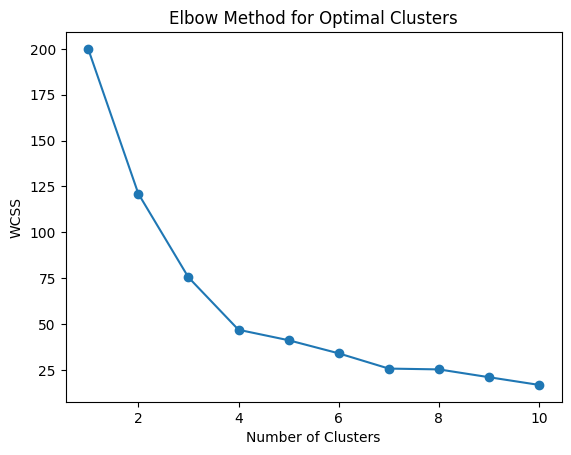

In [69]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fix for memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Example Data (Replace with your actual DataFrame)
df = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100)
})

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Within-Cluster Sum of Squares (WCSS) to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

2. Use Silhouette Score

In [71]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f'Clusters: {i}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.3676194907260168
Clusters: 3, Silhouette Score: 0.38215403940007525
Clusters: 4, Silhouette Score: 0.40853737914352223
Clusters: 5, Silhouette Score: 0.36249996960618797
Clusters: 6, Silhouette Score: 0.3520672168192109
Clusters: 7, Silhouette Score: 0.38019441318713476
Clusters: 8, Silhouette Score: 0.3320558517675646
Clusters: 9, Silhouette Score: 0.3415634811535992
Clusters: 10, Silhouette Score: 0.3748544250093734


# Apply K-Means Clustering

1. Train the Model with Optimal Clusters

In [74]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

2. View Cluster Distribution

In [76]:
print(df['Cluster'].value_counts())  # Number of customers per cluster

Cluster
1    28
0    26
2    25
3    21
Name: count, dtype: int64


# Data Visualization

1. PCA for 2D Visualization

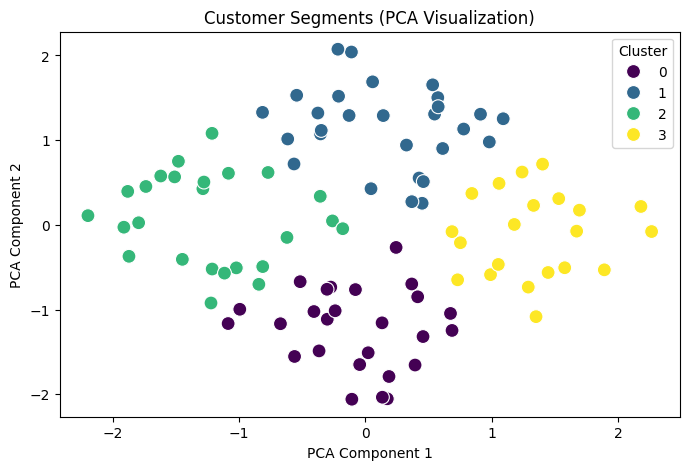

In [79]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)
df['PCA1'] = pca_df[:, 0]
df['PCA2'] = pca_df[:, 1]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (PCA Visualization)')
plt.show()

2. Pair Plot

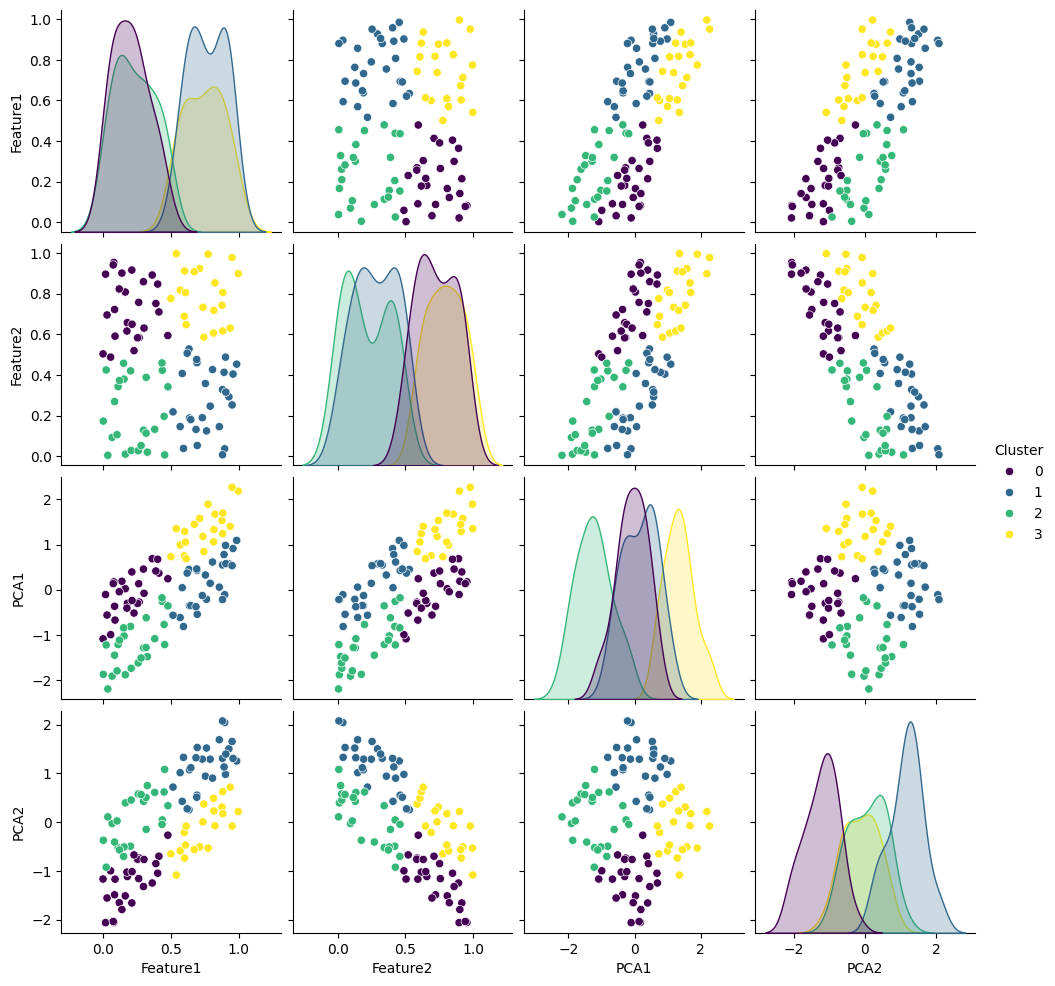

In [81]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

3. Centroid Visualization

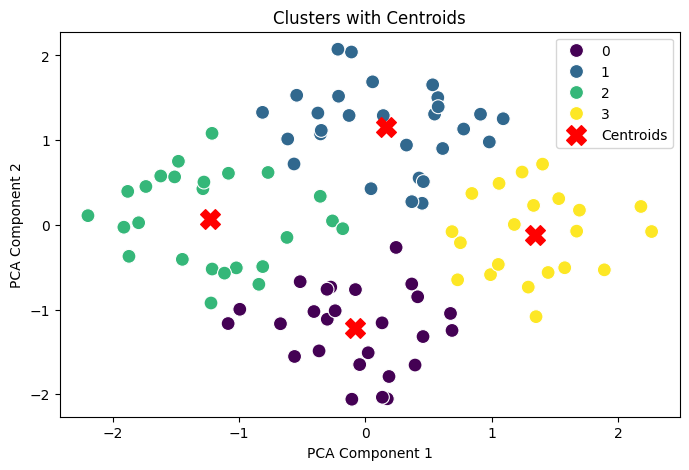

In [83]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters with Centroids')
plt.legend()
plt.show()